In [62]:
require(jpeg)
require(colordistance)
require(ggthemes)
require(ggplot2)

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.1”


In [2]:
files_jpg <- list.files(path = "datasets/pictures/", pattern = "\\.JPG$", full.names = TRUE)

In [40]:
img_list <- lapply(files_jpg, function(file) readJPEG(file))

13 images

Pixel binning method: histogram (predetermined bins)

Binning images...

Warning message in getHistList(im.paths, bins = hist.bins, bin.avg = bin.avg, lower = lower, :
“RGB and HSV are device-dependent, perceptually non-uniform color spaces. See 'Color spaces' vignette for more information.
”
Using 3^3 = 27 total bins



  |======================================================================| 100%


Comparison metric for distance matrix: emd


Calculating distance matrix...

Done



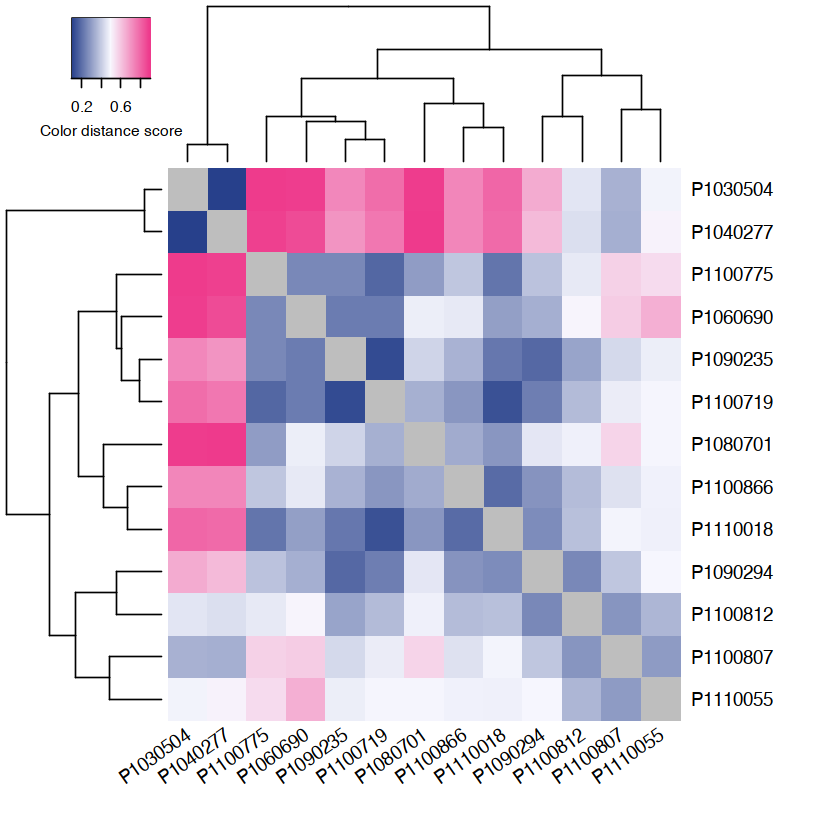

In [46]:
x = imageClusterPipeline(files_jpg)

In [50]:
x[is.na(x)] = 0

In [76]:
dimensions = cmdscale(x, k=2, eig=TRUE)

In [77]:
dimensions

P1030504,-0.57027597,0.007095702
P1040277,-0.55329430,0.082552959
P1060690,0.28860595,0.211080136
P1080701,0.27520648,-0.250985388
P1090235,0.14564466,0.119148546
P1090294,0.05963245,0.129933202
P1100719,0.21310464,0.053209255
P1100775,0.31502679,-0.002143954
P1100807,-0.23881710,-0.020288274
P1100812,-0.11855507,0.017334334
P1100866,0.12790257,-0.093740871


In [83]:
sum(dimensions$eig[1:2])/sum(abs(dimensions$eig))

[1] 0.8548424

In [65]:
file_names <- list.files(path = "datasets/pictures/", pattern = "\\.JPG$", full.names = FALSE)
file_names

[1] "P1030504.JPG" "P1040277.JPG" "P1060690.JPG" "P1080701.JPG" "P1090235.JPG"
 [6] "P1090294.JPG" "P1100719.JPG" "P1100775.JPG" "P1100807.JPG" "P1100812.JPG"
[11] "P1100866.JPG" "P1110018.JPG" "P1110055.JPG"

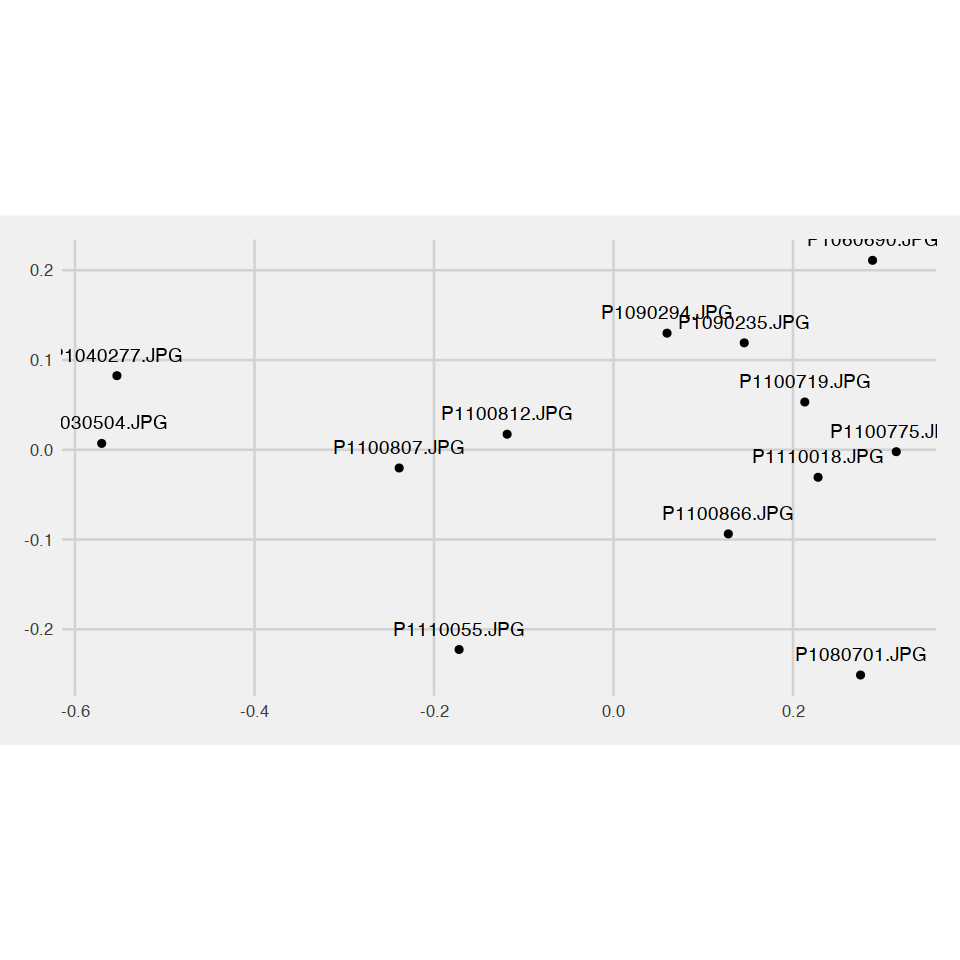

In [74]:
options(repr.plot.width=8, repr.plot.height=8)
result = data.frame(
    FileName = file_names,
    V1 = dimensions[, 1],
    V2 = dimensions[, 2]
)

ggplot(data=result, aes(x=V1, y=V2)) + 
    geom_point() + 
    geom_text(aes(label=FileName),vjust=-1) + 
    theme_fivethirtyeight(base_size = 12, base_family = "sans") + coord_fixed()

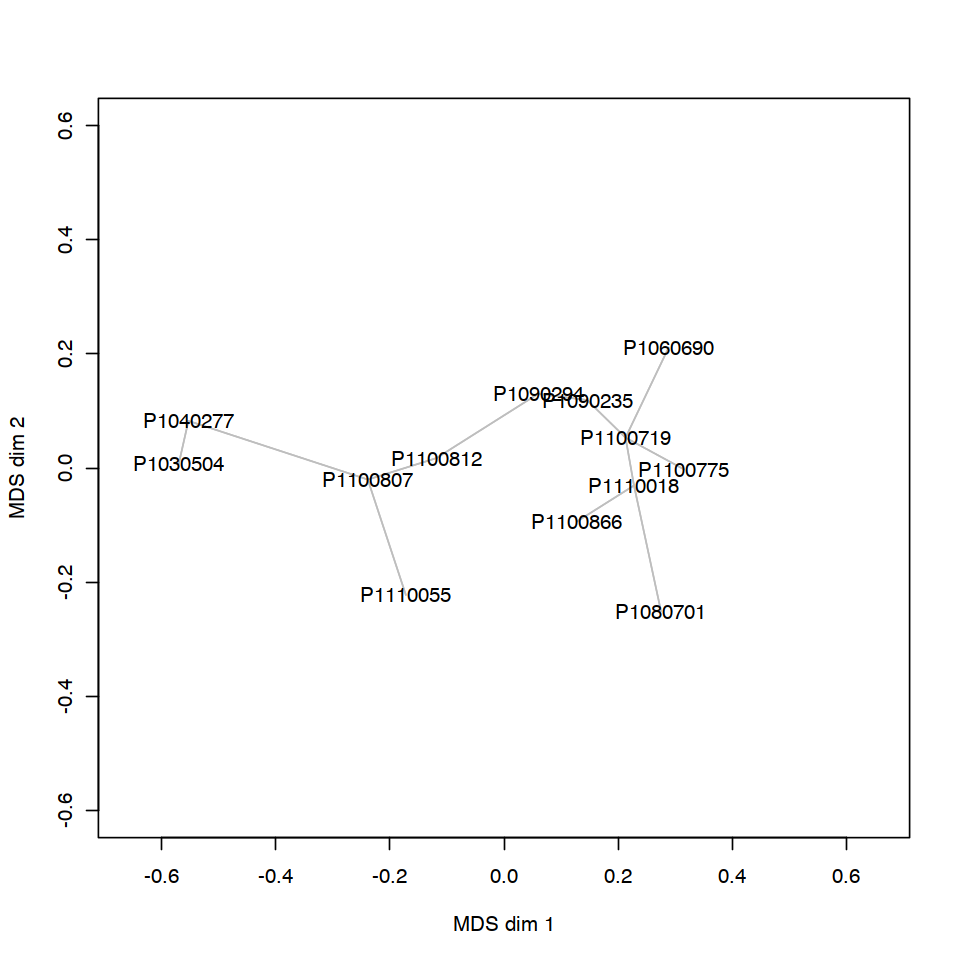

In [90]:
cmd_2d = dimensions$points
tree <- ape::mst(x)
# Create plot
plot(cmd_2d, type = "n", asp = 1,
    xlab = "MDS dim 1", ylab = "MDS dim 2",
    xlim = c(-0.4, 0.4), ylim = c(-0.6, 0.6))
# Loop over pictures
for(i in 1:nrow(tree)) {
# Identify adjacent pictures
    which_adj <- which(tree[i,] == 1)
    # Add segment between pictures i and j if adjacent
    segments(x0 = cmd_2d[i,1],
    y0 = cmd_2d[i,2],
    x1 = cmd_2d[which_adj,1],
    y1 = cmd_2d[which_adj,2],
    col = "grey")
}
# Add labels for picture names
text(cmd_2d, labels = rownames(cmd_2d))

In [91]:
require(MASS)

Loading required package: MASS



In [94]:
dimensions2 = isoMDS(x)

initial  value 6.198156 
iter   5 value 4.550044
iter  10 value 4.472477
iter  10 value 4.468852
iter  10 value 4.468714
final  value 4.468714 
converged


In [99]:
x2 = as.matrix(dist(dimensions2$points))

In [101]:
sum((x - x2)^2)/sum(x)

[1] 0.008047041

In [106]:
classicalMDS = as.matrix(dist(dimensions$points))

In [107]:
sum((x - classicalMDS)^2)/sum(x)

[1] 0.008829438

In [108]:
plot_images <- function(coords, img_list, scale = 0.1) {
    # Create plot
    p <- ggplot(data.frame(x = coords[,1], y = coords[,2]), aes(x, y)) +
    theme_bw() + labs(x = "MDS dim 1", y = "MDS dim 2") +
    coord_equal(xlim = range(coords[,1]) + 0.1*c(-2, 2),
    ylim = range(coords[,2]) + 0.1*c(-2, 2))
    # Define image dimensions (x and y, with 4:3 format)
    width <- 4 * scale
    height <- 3 * scale
    # Loop over images
    for(i in 1:length(img_list)) {
    # Add image to plot
    p <- p + annotation_raster(img_list[[i]],
    xmin = coords[i,1] - width/2,
    xmax = coords[i,1] + width/2,
    ymin = coords[i,2] - height/2,
    ymax = coords[i,2] + height/2)
    }
    # Return plot
    return(p)
}

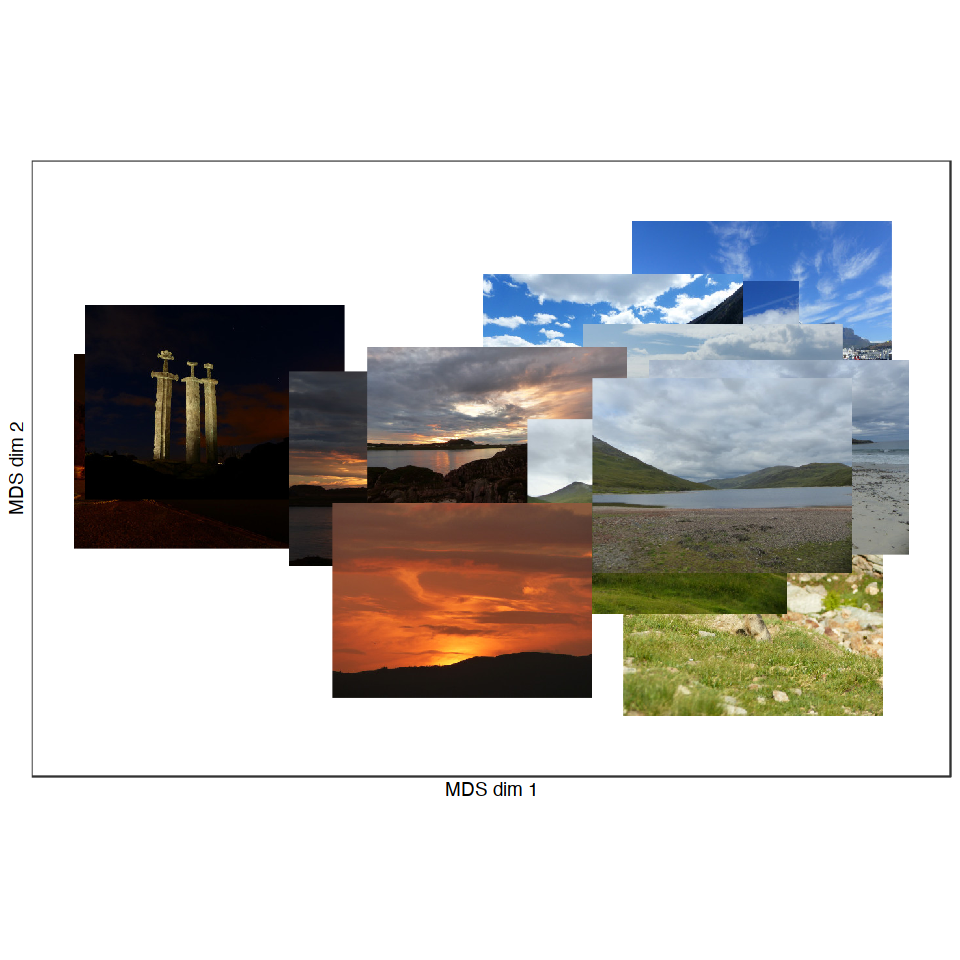

In [109]:
plot_images(dimensions$points, img_list, scale = 0.1)